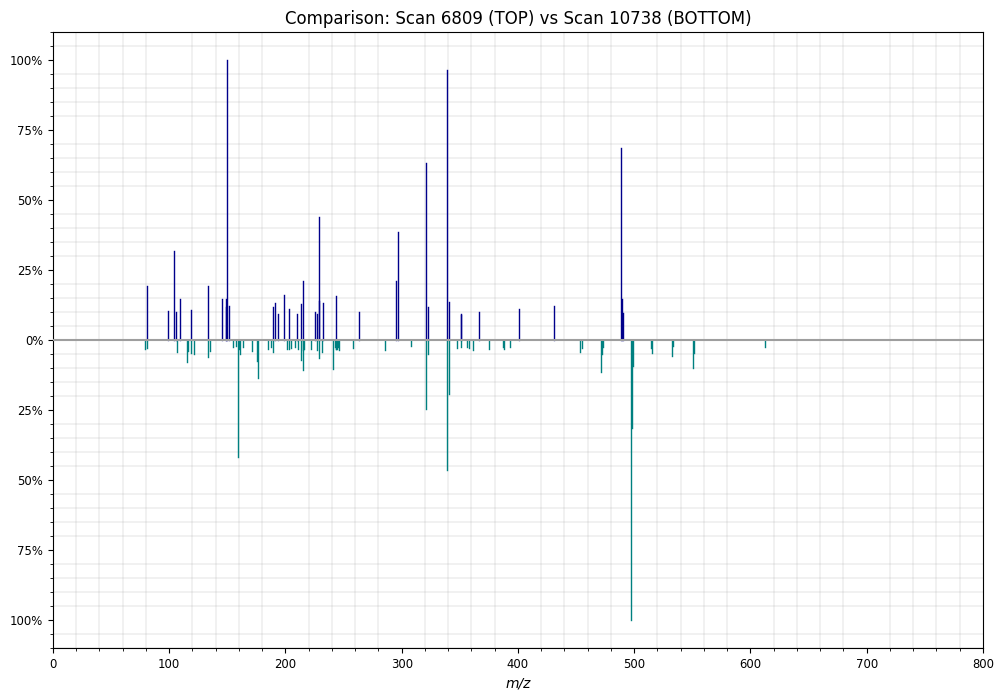

In [7]:
import matplotlib.pyplot as plt
from matchms.importing import load_from_mgf
from matchms.plotting import plot_spectra_mirror

# 1. User Inputs
file_path = "r:/aaa21018/Liz/Code/specs_ms_Bile_acids_9d601b8a.mgf"   #path where mgf is located
scan_num_1 = '6809'   #scan number for one spectra in mgf that you want to compare
scan_num_2 = '10738'  #scan number for spectra you want to compare to previously selected spectra

# 2. Loading the file
spectra = list(load_from_mgf(file_path))

# 3. Finding the specific scans
spec_a = None
spec_b = None

for s in spectra:
    # Matchms stores metadata values as strings
    current_scan = s.metadata.get("scans")
    if current_scan == scan_num_1:
        spec_a = s
    elif current_scan == scan_num_2:
        spec_b = s

# 4. Plotting
if spec_a and spec_b:
    fig, ax = plt.subplots(figsize=(12, 8))
    plot_spectra_mirror(spec_a, spec_b, ax=ax)
    ax.grid(False)
    ax.set_ylabel("")

    for text in ax.texts:
        text.set_visible(False)

    plt.title(f"Comparison: Scan {scan_num_1} (TOP) vs Scan {scan_num_2} (BOTTOM)")
    plt.show()
else:
    print("Could not find one or both scans. Check your scan numbers and try again.")
